# 6.1 - Importação e visualização do banco de dados

### 1. Importar as bibliotecas que irão ser utilizadas:

In [27]:
# a. numpy as np;

import numpy as np

In [28]:
# b. pandas as pd;

import pandas as pd

In [29]:
# c. matplotlib.pyplot;

import matplotlib.pyplot as plt

In [30]:
# d. seaborn as sns;

import seaborn as sns
import warnings # To suppress some warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [31]:
# e. matplotlib inline, para gerar gráficos no próprio notebook;

%matplotlib inline

In [32]:
# f. Configurar o random seed para 0 (np.random.seed(0))

np.random.seed(0)

### 2. Transformar arquivos em dataframe e gerar momentos estatísticos:

In [33]:
# a. Importar os arquivos “kaggle/input/titanic/test.csv” e “kaggle/input/titanic/train.csv”;

unf_train_data = pd.read_csv(r"C:\Users\Cauan\Documents\UFV\NIAS-IA-treinamento-2024-2\Cauan\6 - Introdução ao Machine Learning\Titanic Dataset\train.csv")
unf_test_data = pd.read_csv(r"C:\Users\Cauan\Documents\UFV\NIAS-IA-treinamento-2024-2\Cauan\6 - Introdução ao Machine Learning\Titanic Dataset\test.csv")

In [34]:
# b. Gerar momentos estatísticos sobre o dataframe de treino, utilizando “.describe( )”;

display('Momento estátistico do dataset de treino:',unf_train_data.describe())
display('Momento estátistico do dataset de teste:',unf_test_data.describe())

'Momento estátistico do dataset de treino:'

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'Momento estátistico do dataset de teste:'

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 3. Análise dos dados:

In [35]:
# a. Identificar as Features do banco de dados que são categóricas (não numéricas), e as que são numéricas. As numéricas,
# deve-se separá-las em discretas e contínuas.

## i. Pode-se usar o método “.info( )” para descobrir o tipo de dado de cada Feature.

unf_train_data.info()

# > Note que teremos como categóricas as features: Sex, Name, Ticket, Cabin e Embarked
# > Para as númericas, teremos por discretas as features: PassengerId, Survived, Pclass, SibSp e Parch. Por contínuas teremos: Age e Fare

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
# b. Descobrir quais as Features contém NaN, além da quantidade desse tipo de dado em cada Feature.

## i. Pode-se utilizar o comando “DataFrame.isnull.sum( )”.

unf_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# c. Deve-se utilizar apenas Features numéricas e retirar as categóricas. Portanto, faça dois novos dataframes,
# apenas com as features numéricas do banco de dados de treino e de teste.

train_data = unf_train_data.groupby('PassengerId').agg({'Survived':'sum','Pclass':'sum','SibSp':'sum','Parch':'sum','Age':'sum','Fare':'sum'}).dropna()
test_data = unf_test_data.groupby('PassengerId').agg({'Pclass':'sum','SibSp':'sum','Parch':'sum','Age':'sum','Fare':'sum'}).fillna(value=0)

display(train_data)
display(test_data)

,Survived,Pclass,SibSp,Parch,Age,Fare
PassengerId,,,,,,
1,0,3,1,0,22.0,7.2500
2,1,1,1,0,38.0,71.2833
3,1,3,0,0,26.0,7.9250
4,1,1,1,0,35.0,53.1000
5,0,3,0,0,35.0,8.0500
...,...,...,...,...,...,...
887,0,2,0,0,27.0,13.0000
888,1,1,0,0,19.0,30.0000
889,0,3,1,2,0.0,23.4500


,Pclass,SibSp,Parch,Age,Fare
PassengerId,,,,,
892,3,0,0,34.5,7.8292
893,3,1,0,47.0,7.0000
894,2,0,0,62.0,9.6875
895,3,0,0,27.0,8.6625
896,3,1,1,22.0,12.2875
...,...,...,...,...,...
1305,3,0,0,0.0,8.0500
1306,1,0,0,39.0,108.9000
1307,3,0,0,38.5,7.2500


In [38]:
# As letras d. e e. já foram realizadas na formação dos novos datasets

#  6.2 - Exploração do banco de dados

### 1. Para a Feature “Age” será necessário criar uma nova Feature que a separe em 8 grupos para que se possa utilizar “sns.barplot”. (DICA: Crie um novo dataframe apenas com as informações necessárias para a criação deste gráfico)

In [39]:
# a. criar uma lista com os nomes que serão dados aos grupos em que as idades serão repartidas (Exemplo: “(0-10)”, “(10-20)”, ...) ;

age_groups = ['(0-10)','(10-20)','(20-30)','(30-40)','(40-50)','(50-60)','(60-70)','(70-80)']

In [40]:
# b. utilize pandas.cut, para separar as idades em 8 grupos e utilize o argumento “labels” para utilizar a lista dos nomes dos grupos;
# c. criar a nova coluna com os grupos, perceba que esta nova coluna será categórica;

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

train_data['Age Groups']=pd.cut(train_data.Age, age_bins, right=False, include_lowest=True, labels=age_groups)

In [41]:
# d. criar um gráfico que indique a chance de sobrevivência por grupo de idade;

age_data = train_data.reset_index().groupby('Age_Groups').Survived.sum().reset_index()

plt.figure(figsize=(10,6))
plt.title('Sobreviventes por grupo de idade')

sns.barplot(x=age_data.Age_Groups,y=age_data.Survived)

plt.xlabel('Age Group')

plt.show()

KeyError: 'Age_Groups'

Note que a regra de crianças e mulheres primeiros, em especial as crianças, que são representadas pelo grupo (0-10), surtiu amplo efeito na margem de sobrevivência destas.

Note também a taxa de sobrevivência caindo conforme o aumento da idade, implicando muito provavelmente no efeito da saúde e do vigor na sobrevivência, como também a equipe, provavelmente formada por adultos na faixa etária de 40-60.

### 2. Crie gráficos para todas as outras features numéricas discretas, e faça uma análise dos resultados obtidos. Não será necessário produzir um gráfico para a feature “Fare”. Após a criação de cada gráfico será necessário realizar uma breve análise para avaliação do impacto de cada feature na predição.

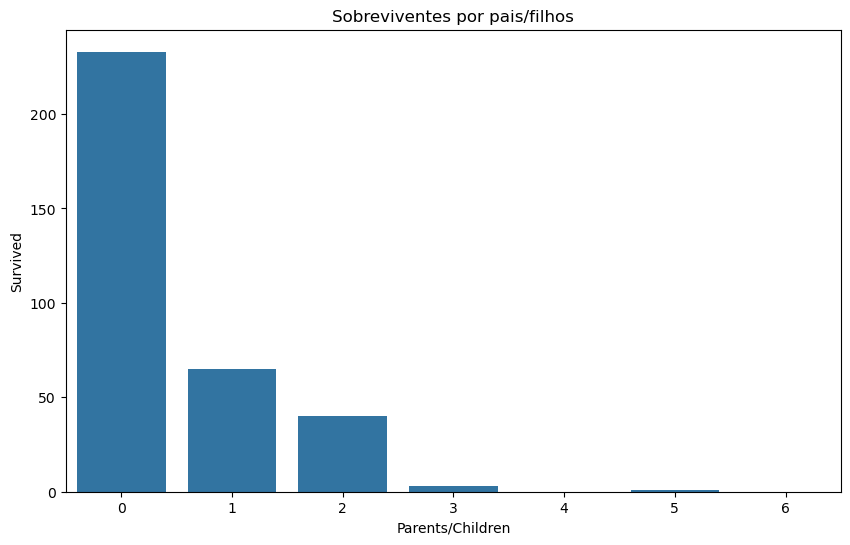

In [ ]:
# Parch

Parch_data = train_data.groupby('Parch').Survived.sum().reset_index()

plt.figure(figsize=(10,6))
plt.title('Sobreviventes por pais/filhos')

sns.barplot(x=Parch_data.Parch,y=Parch_data.Survived)

plt.xlabel('Parents/Children')

plt.show()

# Note que, similar ao gráfico acima, um número menor de pais ou filhos acompanhando o sobrevivente, maior a chance de sobrevivência. Nesse caso, a diferença é ainda mais
# drástica e muito disso certamente pode ser atrelado ao príncipio de mulheres e crianças primeiro nos botes, mas também novamente a difusão da atenção, maior fragilidade
# das crianças, maior fragilidade de pais idosos, etc.

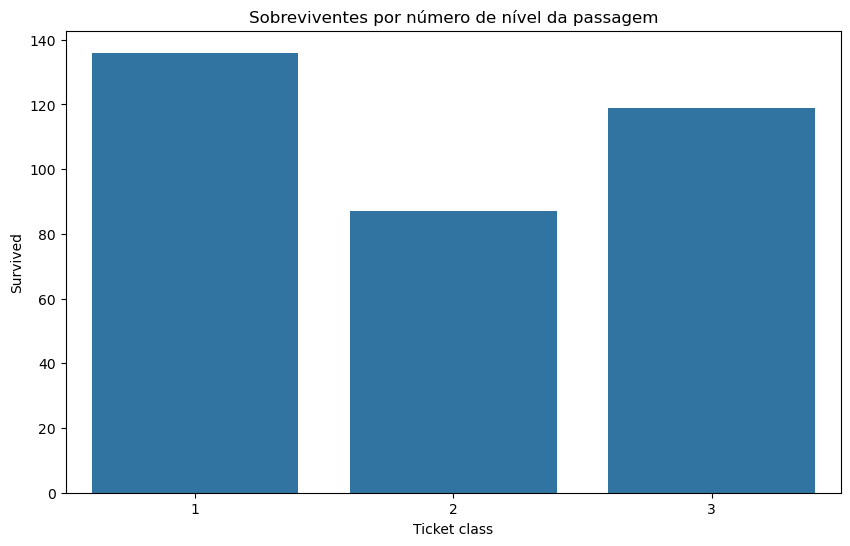

In [ ]:
#Pclass

Pclass_data = train_data.groupby('Pclass').Survived.sum().reset_index()

plt.figure(figsize=(10,6))
plt.title('Sobreviventes por número de nível da passagem')

sns.barplot(x=Pclass_data.Pclass,y=Pclass_data.Survived)

plt.xlabel('Ticket class')

plt.show()

# Note um padrão parecido entre as colunas, entretanto note a quantidade de passageiros por clase de ticket influencia muito nesse número, já que a quantidade de passageiros
# considerados terceira classe era consideravelmente maior do que os das classes "acima". Observando esse fato e a similaridade no número de sobreviventes, é possível
# observar as vantagens garantidas pelo nível da passagem do sobrevivente.

# 6.3 - Treinamento do modelo e submissão das predições

### 1. Separação de banco de dados de treino e validação:

In [ ]:
# a. Criar variável X, contendo o banco de dados apenas das Features;

train_features = ['SibSp','Pclass','Parch','Age', 'Fare']

X = train_data[train_features]

In [ ]:
# b. Criar variável y, contendo o target da predição;

y = train_data.Survived

In [42]:
# c. Usar Train Test Split para separar treino e validação (DICA: utilizar validação com 20% do tamanho do treino);

from sklearn.model_selection import train_test_split

train_X,val_X, train_y,val_y = train_test_split(X,y,random_state=1,train_size=0.8)

### 2. Treinamento e validação do modelo:

In [43]:
### a. Importar Random Forest Classifier da biblioteca sklearn.ensemble;

from sklearn.ensemble import RandomForestClassifier

In [44]:
# b. Importar accuracy score da biblioteca sklearn.metrics;

from sklearn.metrics import accuracy_score

In [46]:
# c. Treinar random forest com as features e o target de treino;

titanic_model = RandomForestClassifier(random_state=1)


titanic_model.fit(train_X,train_y)

RandomForestClassifier(random_state=1)

In [47]:
# d. Realizar a predição;

titanic_model.predict(val_X)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [48]:
# e. Validar a predição, comparando com o target da validação, utilizando accuracy score;

accuracy_score(val_y,titanic_model.predict(val_X))

0.6536312849162011

Dada as limitações do modelo, a predição é satisfatória

### 3. Gerar predição, salvar a versão e submeter à competição:

In [ ]:
# Gerar predição, salvar a versão e submeter à competição:

titanic_model.fit(X,y)

index = test_data.index

test_X = test_data[train_features]

titanic_model.predict(test_X)

titanic_submission = pd.DataFrame({'PassengerId':index,'Survived':titanic_model.predict(test_X)}).set_index('PassengerId')
titanic_submission

titanic_submission.to_csv()

O código acima foi utilizado para gerar o arquivo de submissão em um notebook do Kaggle. O output resultante obteve precisão de 0.62200